## Importing libraries and data, then exploring.

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.

tr = pd.read_csv('turtle_reviews.csv')

# Sense-check

print(tr.columns)

print(tr.info())

print(tr.head())

print(tr.info())

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: f

In [4]:
# Missing values check

print(tr.isnull().sum())


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Summary of the descriptive statistics

print(tr.describe())


               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## Cleaning

In [6]:
# Remove redundant columns

tr_cleaned = tr.drop(columns=['language', 'platform'])


In [7]:
# Rename columns for easier reference

tr_cleaned.rename(columns={
    'remuneration (k£)': 'income',
    'spending_score (1-100)': 'spend_score'
}, inplace=True)

# View column names.

tr_cleaned.columns

Index(['gender', 'age', 'income', 'spend_score', 'loyalty_points', 'education',
       'product', 'review', 'summary'],
      dtype='object')

## Saved clean data, imported it again.

In [8]:
# Save cleaned data to a new CSV file

tr_cleaned.to_csv('cleaned_turtle_reviews.csv', index=False)


In [9]:
# Import it again for verification

clean_tr = pd.read_csv('cleaned_turtle_reviews.csv')
print(clean_tr.shape)


(2000, 9)


## Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = clean_tr[['age', 'income', 'spend_score']]
y = clean_tr['loyalty_points']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Predicted values
y_pred = model.predict(X_test)


Coefficients:  [11.01369477 34.24565623 33.96807268]
Intercept:  -2197.0105106183955


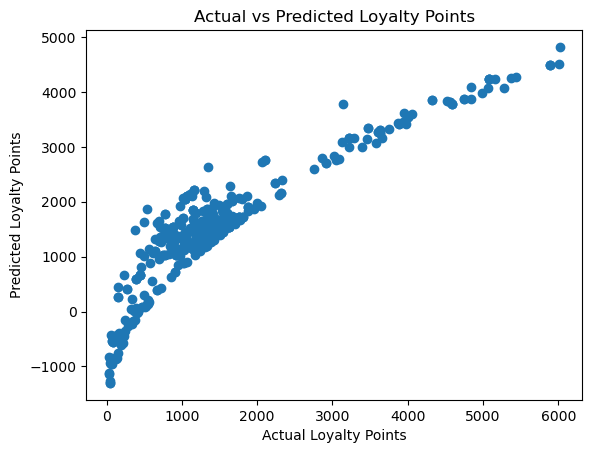

In [12]:
# Scatter plot to compare actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Actual vs Predicted Loyalty Points')
plt.show()


Coefficient: 33.06169325867294, Intercept: -75.05266293364707


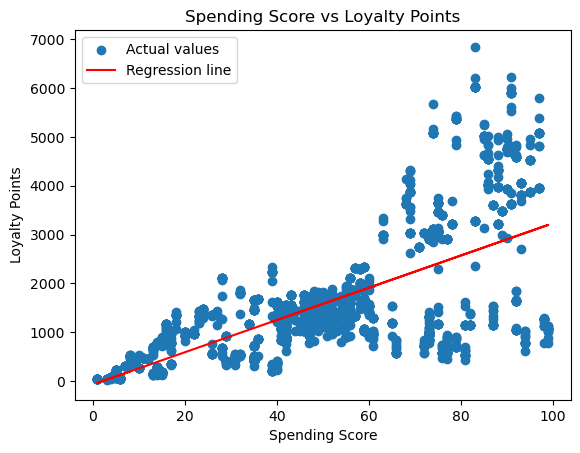

In [13]:
# Import libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define independent and dependent variables for spending vs loyalty
X = clean_tr[['spend_score']]
y = clean_tr['loyalty_points']

# Fit the model in one step
model = LinearRegression().fit(X, y)

# Extract and print coefficients and intercept in one line
print(f"Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}")

# Predictions
y_pred = model.predict(X)

# Plot the results with regression line
plt.scatter(X, y, label='Actual values')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score vs Loyalty Points')
plt.legend()
plt.show()


Coefficients: [11.01369477 34.24565623 33.96807268]
Intercept: -2197.0105106183955
R-squared: 0.8291
Mean Squared Error: 277188.7023


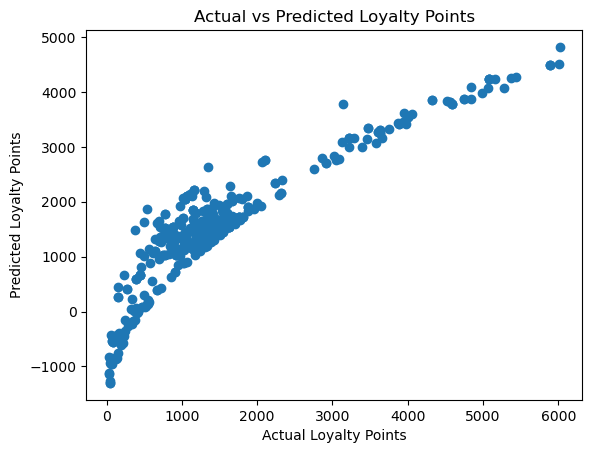

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:10:38   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2197.0105     58.134    -37.792      

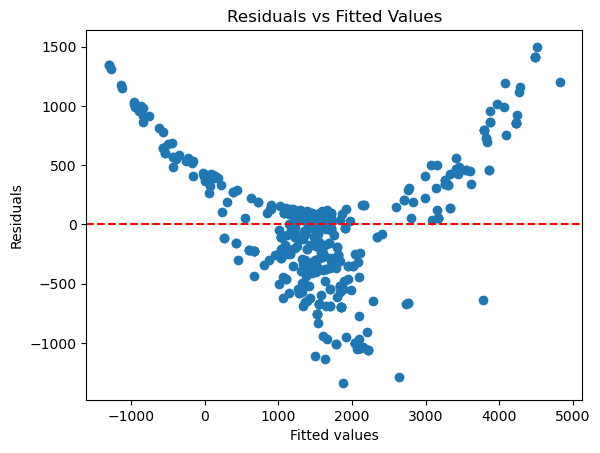

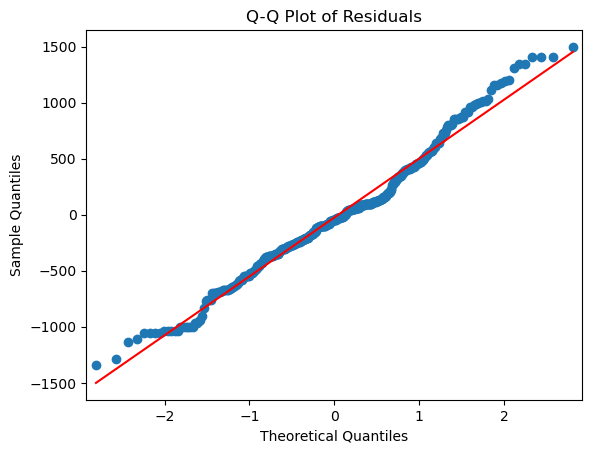

In [14]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X contains the independent variables

X = clean_tr[['age', 'income', 'spend_score']]

# y contains the dependent variable

y = clean_tr['loyalty_points']

# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model using training data

model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients and intercept

coefficients = model.coef_
intercept = model.intercept_

# Print out the coefficients and intercept

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Predict on the test data

y_pred = model.predict(X_test)

# Evaluate model performance using R-squared and MSE

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print model evaluation metrics

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot Actual vs Predicted Loyalty Points for test data

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Actual vs Predicted Loyalty Points')
plt.show()

# Add a constant to X_train for the intercept term

X_train_sm = sm.add_constant(X_train)

# Fit an OLS model

ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print out the detailed regression summary

print(ols_model.summary())

# Diagnostic plots (Residual vs Fitted)

residuals = y_test - y_pred

# Plot residuals to assess linearity and homoscedasticity

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Perform a Q-Q plot to check the normality of residuals

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


## 6. Observations and insights:

***Observations:***






1. Model peformance:
    The multiple linear regression model achieved a solid R-squared of 0.8291, explaining 82.91% of the variance in customer loyalty points based on age, income, and spend score. This indicates that the chosen predictors significantly influence loyalty points.
    Coefficients indicate that income and spending score have a stronger impact on loyalty points than age does, with income having the highest coefficient (34.2457). What this means is that higher-income customers on average accumulate more loyalty points, which is standard for most businesses.

2. Residual and Diagnostic Analysis:
    The residuals vs fitted values plot shows a slight curvature, this implies a potential non-linearity in the relationship between predictors and loyalty points. This could mean that for higher values of loyalty points, the linear assumption may not hold. Using a non-linear model may improve the fit.
    The Q-Q plot of residuals shows deviations at the extremees which indicates a possibility of outliers in the dataset. These outliers could be influential and may warrant further investigation which would improve the models performance.
    
3. OLS summary:
    The p-values for age,income, and spend score are all extremely small (p < 0.05), this indicates that these predictors are statistically significant.
    
***SUGGESTIONS FOR FURTHER IMPROVEMENTS:***

1. Use log transformations to make the data more manageable and enhance the model.

2. Investigate that outliers observed in the plot may potentially represent unique customer segments that require a more tailored approach, or more in-depth analysis.




## Summary:

From the multiple linear regression analysis, I observed that both income and spending score are the most significant catalysts for loyalty point gain, with income showing the largest positive impact. This insight is extremely valuable for customer segmentation to allow for the shoppers to receive targeted and more personal advertisement, improved customer experience and guided product development. Customers with higher incomes and spending scores on average accumulate more loyalty points, which suggests a strong correlation between spending behaviour and brand loyalty.

The model does indicate a potential non-linear relationship between these variables however, especially for customers with high loyalty points.

There are some customers with atypical loyalty patterns, known from the presence of outliers. Investigating these outliers could reveal new insights into unique customer behaviours, such as premium spenders or infrequent but high-value shoppers. 
Moving forward the model should be refined for exploring non-linear relationships, and conducting deeper analysis of customer segments for reasons previously stated.

## Load and prepare the data

In [15]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [16]:
# New DataFrame.

clean_tr3 = clean_tr.copy()

# Dropping irrelevant columns for the model

clean_tr3 = clean_tr.drop(columns=['product', 'review', 'summary'])

In [17]:
# Specify Y (Dependent variable).

y = clean_tr3['loyalty_points']  

# Specify X (Independent variable).

X = clean_tr3.drop(columns=['loyalty_points'])

In [18]:
# Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

# Display cleaned data for verification

X.head()

,age,income,spend_score,gender_Male,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,True,False,False,True,False
1,23,12.30,81,True,False,False,True,False
2,22,13.12,6,False,False,False,True,False
3,25,13.12,77,False,False,False,True,False
4,33,13.94,40,False,False,False,True,False


## Create train and test data sets.

In [19]:
# Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)


## Create and fit Decision tree regressor

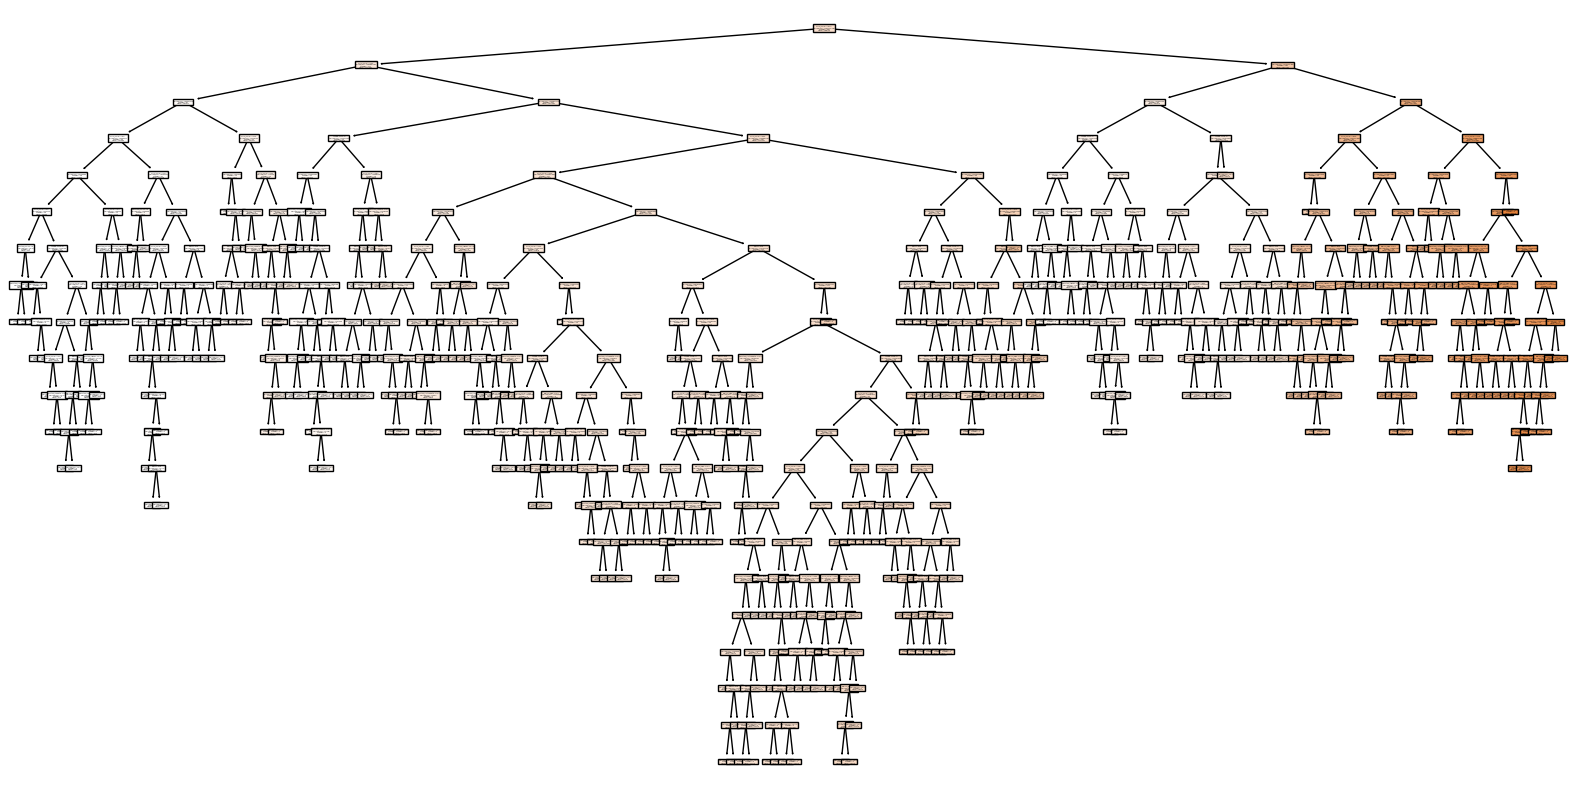

In [20]:
# Creating decision tree regressor.

regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data

regressor.fit(X_train, y_train)

# Create an unpruned decision tree plot

plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()


In [21]:
# Fit with basic pruning 

regressor_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor_pruned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

## Plot final model.

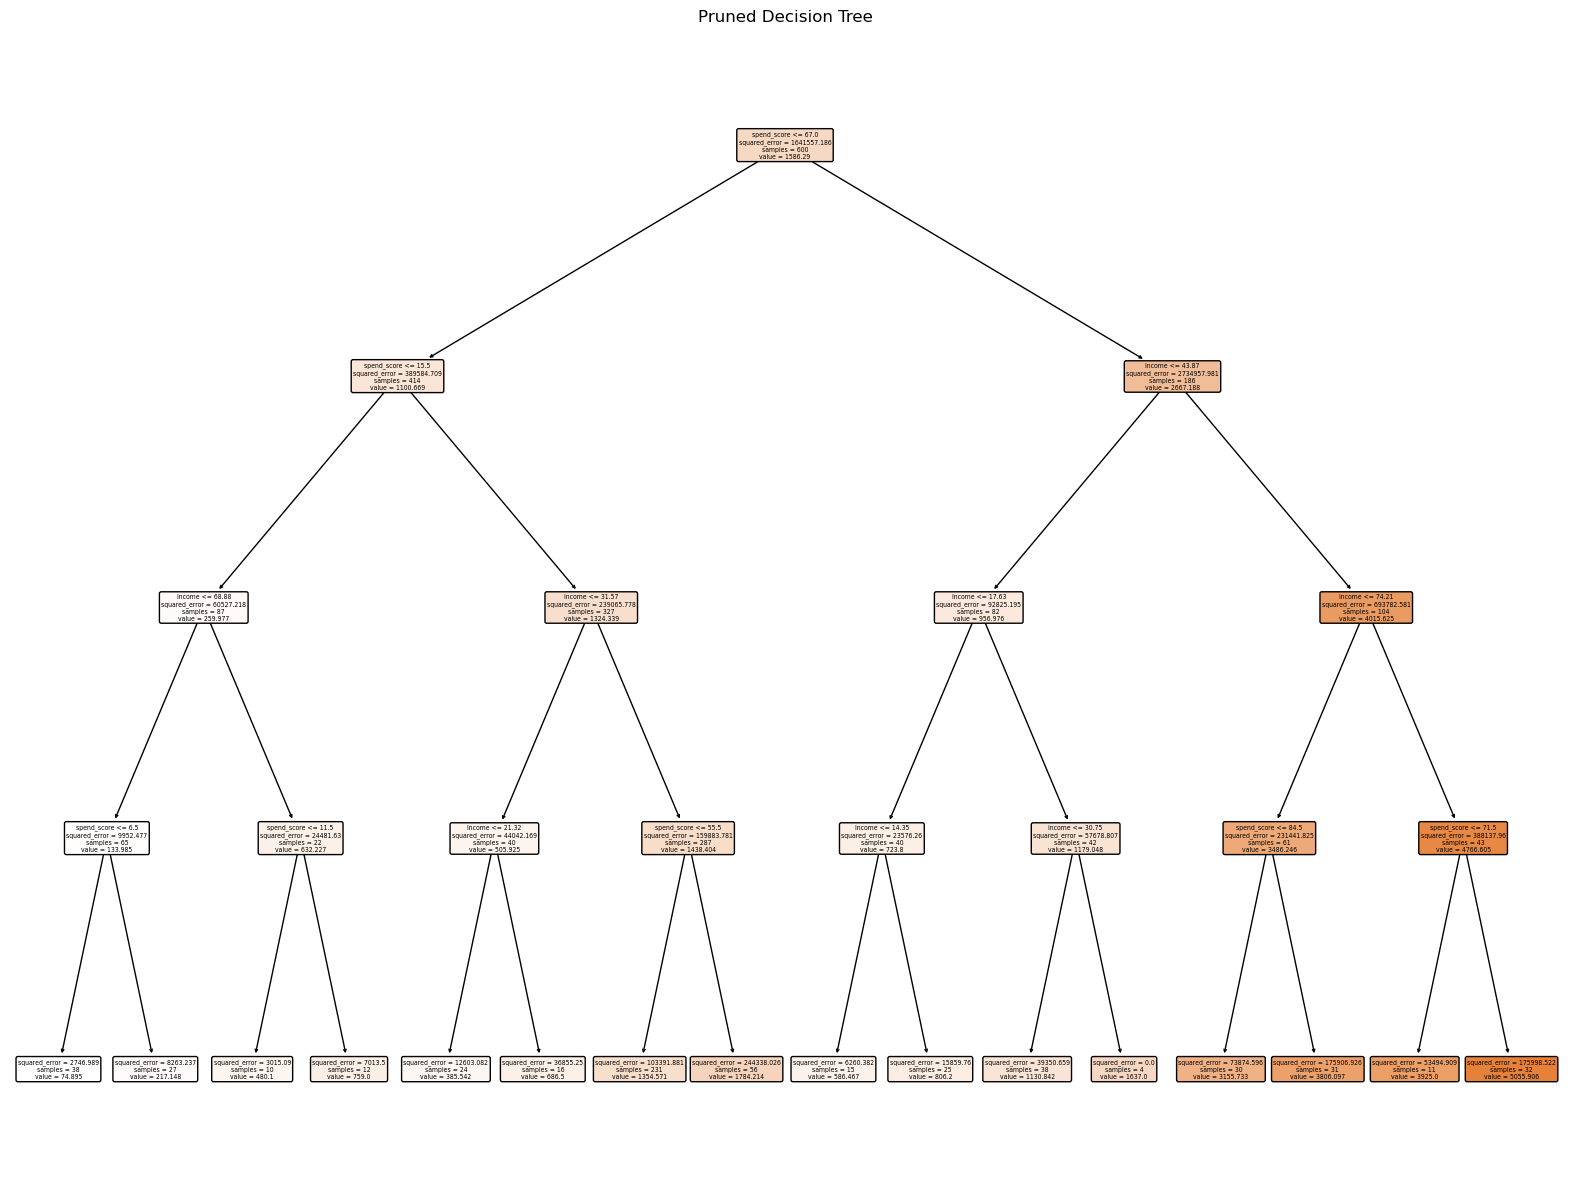

In [22]:
# Plotting the decision tree

plt.figure(figsize=(20, 15))
tree.plot_tree(regressor_pruned, filled=True, feature_names=X.columns, rounded=True)
plt.title("Pruned Decision Tree")
plt.show()


In [23]:
# Evaluate the unpruned model

unpruned_score = regressor.score(X_test, y_test)

# Evaluate the pruned model

pruned_score = regressor_pruned.score(X_test, y_test)

# Print results for evaluation

print(f'Unpruned model R² score: {unpruned_score}')
print(f'Pruned model R² score: {pruned_score}')


Unpruned model R² score: 0.9912844226538717
Pruned model R² score: 0.9357435835782622


## Insights, observations and evaluation:

***Observations:***

The final tree is balanced, pruned and doesn't include excessive depth, which is good for avoiding overfitting and making sure the tree generalizes well on unseen data. This means that the less significant details in the data set arent overly fit to the Tree. The R² is still quite high in order to maintain good predictive power without overfitting.

The most important variables contributing towards loyalty points are spending score, and income. These insights can help turtle games to better target high value customers, personalizing marketing strategies for those who show the highest potential for loyalty.

Turtle games can also offer targeted loyalty programs or rewards systems for high potential customers and identify customer segments that may need more incentivization to increase loyalty and spending.

To improve this model we could test different pruning techniques/parameters, ensuring the best balance between model performance and simplicity.

*The squared errors displayed in each node shows a degree of variance in loyalty points predictions. The squared error decreases as it progresses down the tree, which indicates that the tree is minimizing prediction errors.

***Key business insights:***

Based on the pruned tree, the higher the spending score and income are the more accumulated loyalty points customers have. This suggests that Turtle Games are already rewarding high spenders, incentivising valuable customers.
    TG could target medium-income customers with moderate spending scores with specific, bespoke and exciting loyatly programs in order encourage engagement in this demographic.

***Con of using decision trees in business context:***

There is a bias towards dominant features early in the tree, important nuances like demographics or minor purchasing. This could skew results.

Overfitting would be a con without pruning.

***Assumptions and Biases***

The decision tree is based on the features acting independently, while in reality it may be a bit more complicated that that.

There is limited complexity as decisions trees can oversimplify relationships.

## Summary

The decision tree reveals that spending score and income are the primary drivers of loyalty points accumulation. On average the higher the income and spending score of a customer the more loyalty points which makes these variables the key to optimizing Turtle Games' loyalty programs. The pruned decision tree offers a better balance between predictive power and interpretability, making it a more reliable tool for decision making in the business. Targeted loyalty campaigns aimed at the high value customers previously stated are the key that this data has provided.

# 

## Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Create dataframe with relevant columns.

clean_tr4 = clean_tr[['income', 'spend_score']].copy()


# View DataFrame.

print(clean_tr4.columns)


Index(['income', 'spend_score'], dtype='object')


In [26]:
# Explore the data.

print(clean_tr4.describe())

            income  spend_score
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000


## Plot ***check graph***

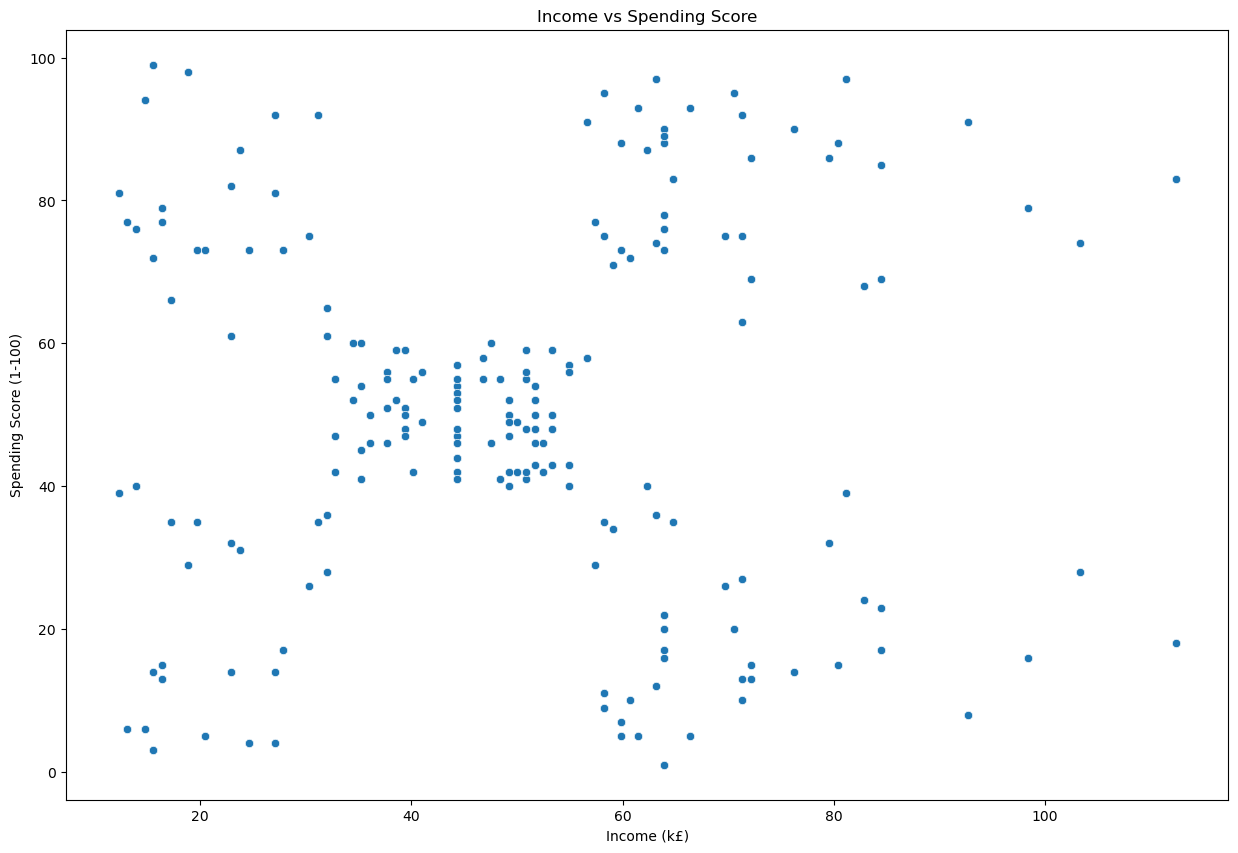

In [27]:
# Create a scatterplot with Seaborn.

sns.scatterplot(data=clean_tr4, x='income', y='spend_score')
plt.title('Income vs Spending Score')
plt.xlabel('Income (k£)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [28]:
# Create a pairplot with Seaborn.


## Elbow and silhoutte methods

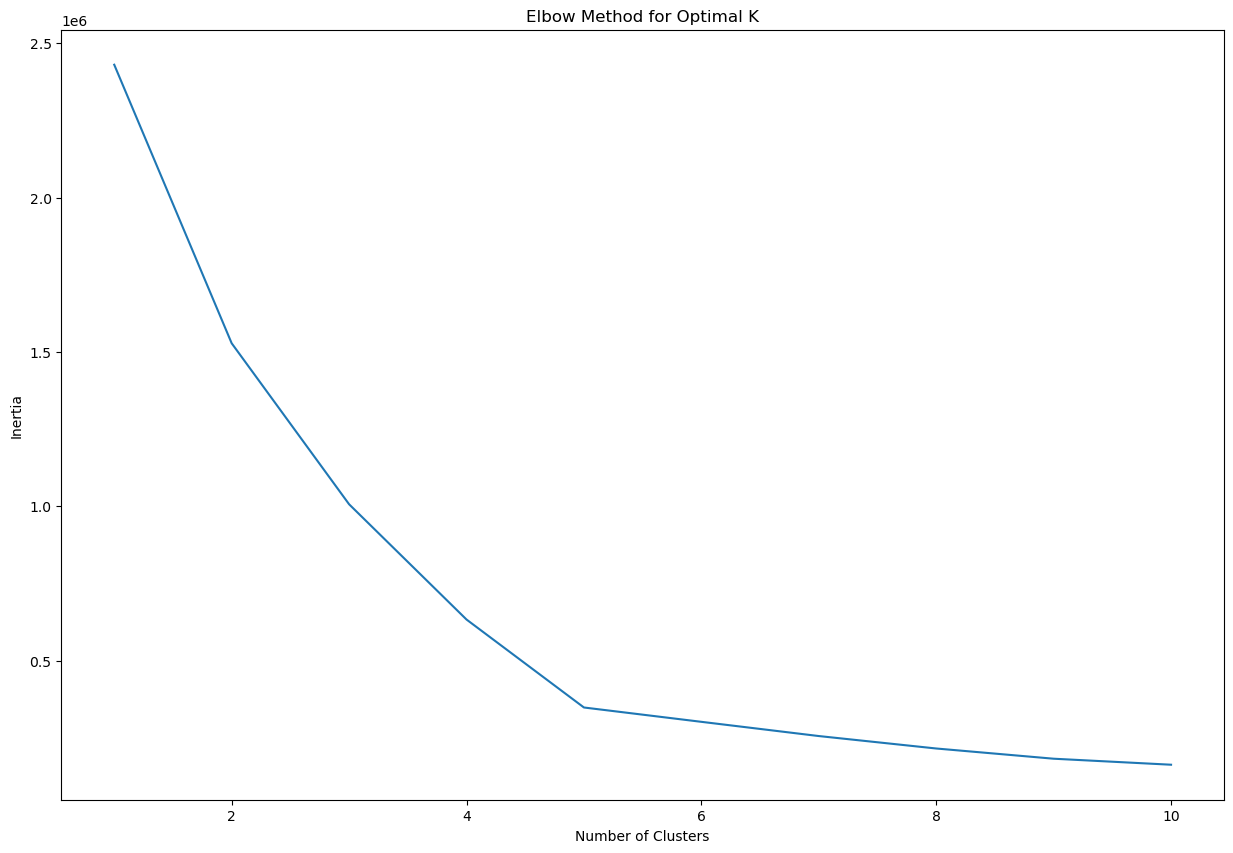

In [29]:
# Using the Elbow method to determine the number of clusters.

def elbow_method(data):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

# Plot Elbow method

inertia = elbow_method(clean_tr4)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

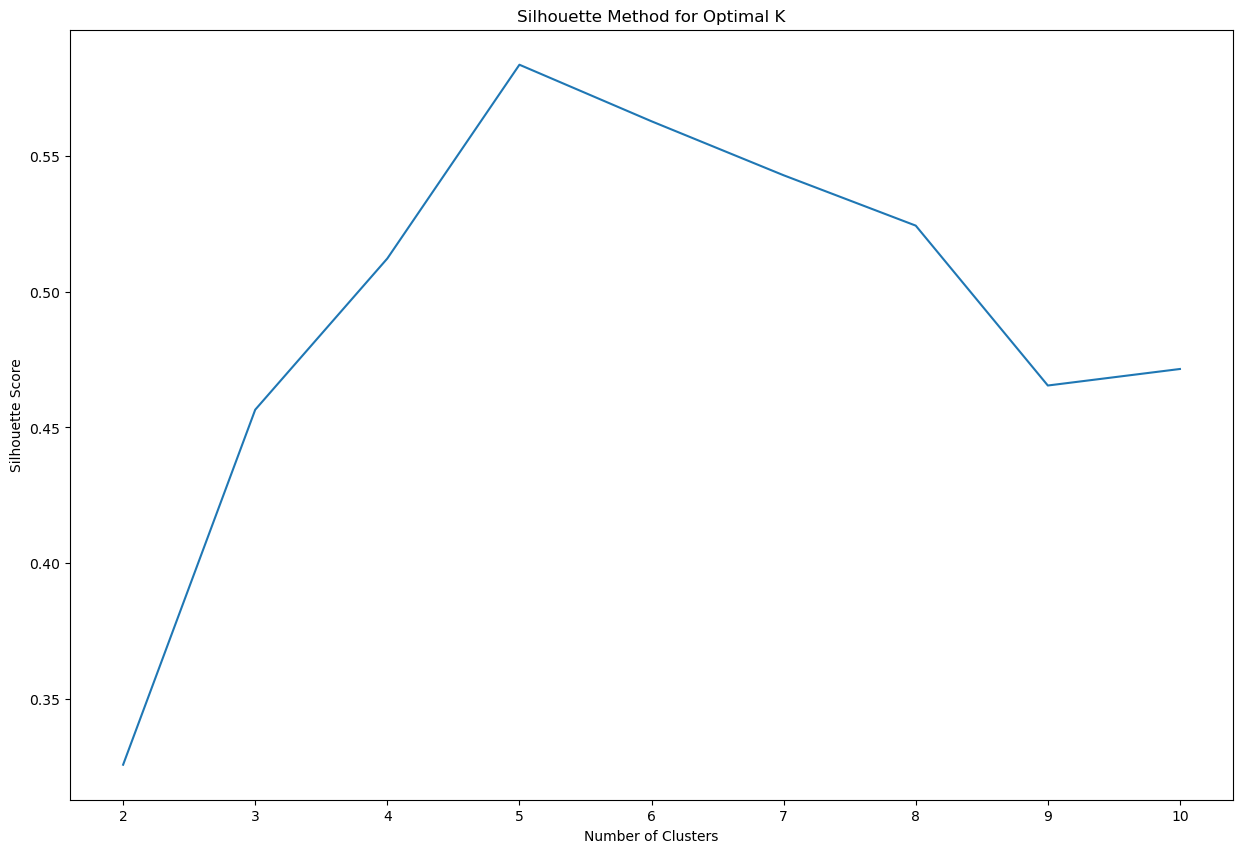

In [30]:
# Using Silhouette method to determine the number of clusters.

def silhouette_method(data):
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    return silhouette_scores

# Plot Silhouette method

sil_scores = silhouette_method(clean_tr4)
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Evaluate k-means model at different values of *k*

In [31]:
# Applying KMeans with optimal K

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clean_tr4['cluster'] = kmeans.fit_predict(clean_tr4)

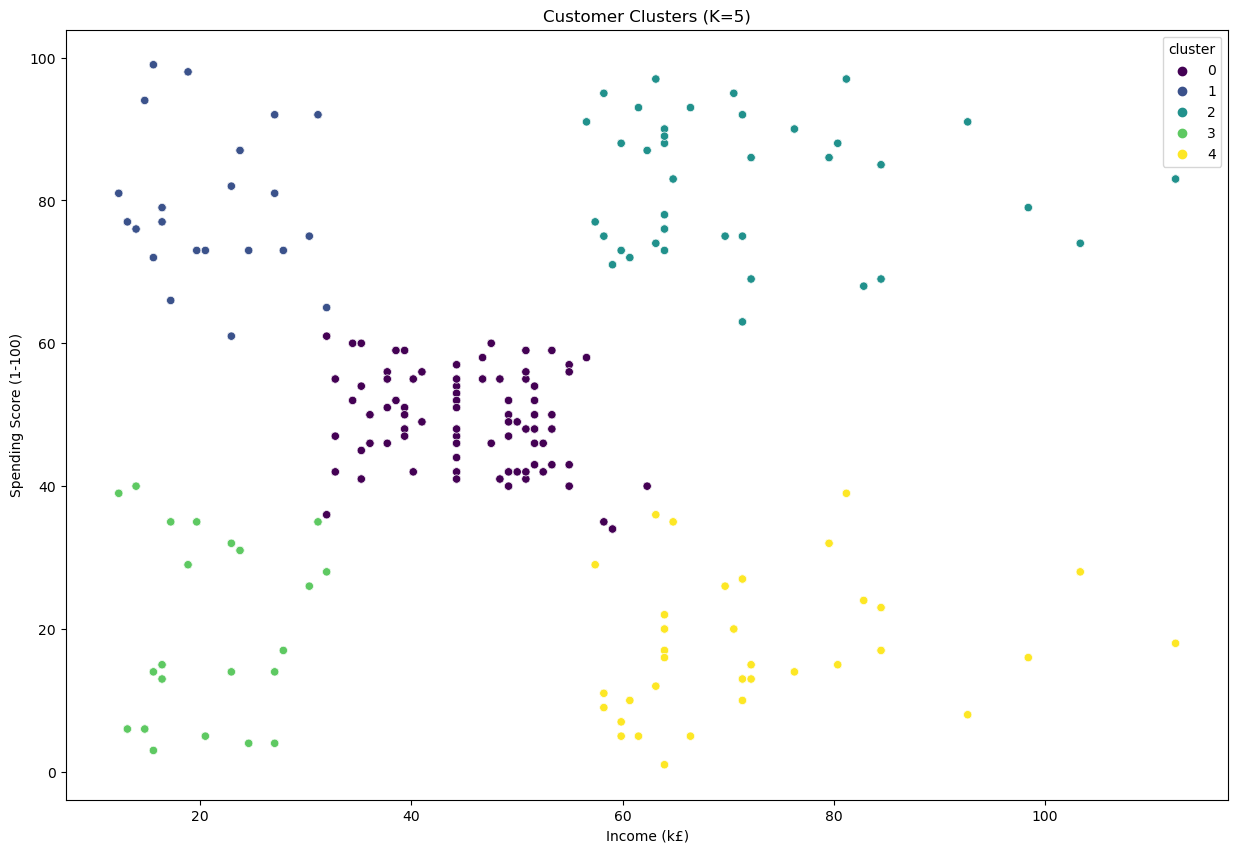

In [32]:
# Visualizing the clusters

sns.scatterplot(data=clean_tr4, x='income', y='spend_score', hue='cluster', palette='viridis')
plt.title(f'Customer Clusters (K={optimal_k})')
plt.xlabel('Income (k£)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## Interpret the clusters

In [33]:
# Visualising the clusters.

cluster_counts = clean_tr4['cluster'].value_counts()
print(cluster_counts)


cluster
0    774
2    356
4    330
3    271
1    269
Name: count, dtype: int64


The final model has 5 clusters which indicate a diverse set of customer segments. The largest represents a significant proportion of the customer base, which makes sense as it lies in the midgrounds of income and spend score.

## Insights, and observations.

***Cluster 0 (Purple): 1ST***
       Characteristics: This group has mid-level incomes (mostly between 30k-60k) and moderately spends (mostly a 40 to 60 spending score)
       Actionable insight: These are potentially loyal and have a good amount of disposable income. Consider targeted promotions or increasingly targeted loyalty programs to encourage higher spending.
       
***Cluster 1 (Dark blue): 5TH***       
       Characteristics: High spending score, alongside low income. Smallest overall group.
       Actionable insight: This group are those who rely on the shop for day to day entertainment. Rewarding these customers further will continue this trend. Consider making a monthly subscription package including vouchers, toys, boardgames and videogames. This will allow for more steady and predictable revenue curve, and helping to retain and engage this unlikely group of customers.
      
***Cluster 2 (Teal): 2ND***   
       Characteristics: High spenders, high income. Quite high percentage of customers.
       Actionable insight: Premium customer group. Investing in limited edition, luxury products and personalized experiences will maintain their high levels of spending and engagement.
       
***Cluster 3 (Green): 4TH***       
       Characteristics: Low spenders, low income. Lower percentage of customers
       Actionable insight: These customers are more price-conscious, and for good reason due to their lower income. Offering budget friendly deals and lower priced memorable items such as key chains will help increase retainment and engagement
       
***Cluster 4 (Yellow): 3RD***     
       Characteristics: Low spenders, high income. A substantial amount of customers not spending.
       Actionable insight: These customers spend little compared to their disposable income. Premium products and luxury bundles are the key to increase their spending, alongside targeted advertisement.

## Assumptions and biases.

The scatterplots only visualize two features. This simplifies the data and allows for analysis but forgoes the possibility that other significant features, e.g. loyalty points and product preferences, affect the data. Customers could be more accurately segemented with this data included.

Those with colour blindness will have an issue with viewing the visualisations.

The analysis assumed that customer behaviour does not change over time. Customer spending habits and preferences can change overnight.

## Summary


Key customer groups were identified based on their spending scores. Cluster 0, those who moderately spend, whom have moderate incomes, are our largest customer segment by far with loyalty programs being the key to drive retainment and engagement. The most valuable group is cluster 2, those with high income and spending. This premium market segment can be further utilized by investing in the creation of premium, limited edition, products and personalized experiences.

For other clusters, some actionable strategies to drive sales include:
    Cluster 1 (high spenders, low income): Monthly subscription packages.
    Cluster 3 (low spenders, low income): Low priced memorable items.
    Cluster 4 (low spenders, high income): Premium products and luxury bundles.
    
All of these ideas, albeit personalised to the customer group, will drive sales in every customer sector. The next step is to create these products and tailor advertisements to each group.

# 

## Load and explore the data

In [34]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import string
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the CSV file
file_path = 'cleaned_turtle_reviews.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
data.head()


,gender,age,income,spend_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## Prepare the data for NLP


In [36]:
# Retain the 'review' and 'summary' columns

data = data[['review', 'summary']].dropna()

# Punctuation, stopword and non-alphabetic token removal. Lowercase the column also.

def clean_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english') and word.isalpha()] 
    return ' '.join(tokens)

# Apply the cleaning function
data['cleaned_review'] = data['review'].apply(clean_text)
data['cleaned_summary'] = data['summary'].apply(clean_text)


## Word clouds

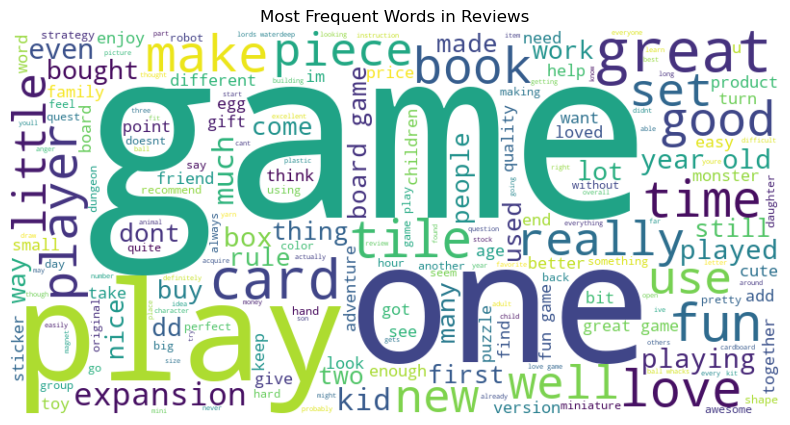

In [37]:
# Tokenization and word cloud for reviews

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_review']))

# Display the word cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()


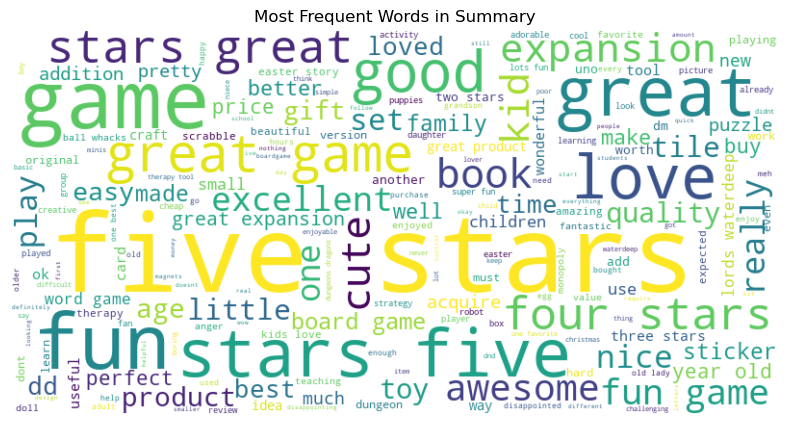

In [38]:
# Tokenization and word cloud for summary

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_summary']))

# Display the word cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Summary')
plt.show()


## Frequency distribution 

In [39]:
# Tokenize the cleaned reviews

all_words = ' '.join(data['cleaned_review']).split()

# Calculate word frequency

word_freq = Counter(all_words)
common_words = word_freq.most_common(15)
common_words

[('game', 1685),
 ('great', 596),
 ('fun', 553),
 ('one', 530),
 ('play', 502),
 ('like', 414),
 ('love', 331),
 ('really', 319),
 ('get', 319),
 ('cards', 301),
 ('tiles', 297),
 ('good', 294),
 ('time', 291),
 ('would', 280),
 ('book', 273)]

In [40]:
# Tokenize the cleaned reviews

all_words = ' '.join(data['cleaned_summary']).split()

# Calculate word frequency

word_freq = Counter(all_words)
common_words = word_freq.most_common(15)
common_words

[('stars', 466),
 ('five', 381),
 ('game', 319),
 ('great', 295),
 ('fun', 218),
 ('love', 93),
 ('good', 92),
 ('four', 58),
 ('like', 54),
 ('expansion', 52),
 ('kids', 50),
 ('cute', 45),
 ('book', 43),
 ('one', 38),
 ('awesome', 36)]

In [41]:
# downloading necessary package

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gianf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Initialize the VADER sentiment analyzer

sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment polarity

def sentiment_score(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis on the reviews

data['sentiment_score'] = data['cleaned_review'].apply(sentiment_score)

# Apply sentiment analysis on the cleaned_summary column

data['sentiment_score_summary'] = data['cleaned_summary'].apply(sentiment_score)

# Sort reviews by sentiment score to get top 20 positive and negative reviews

top_20_positive = data.nlargest(20, 'sentiment_score')[['review', 'sentiment_score']]
top_20_negative = data.nsmallest(20, 'sentiment_score')[['review', 'sentiment_score']]

# Display the top 20 positive reviews

print("\033[1mTop 20 positive reviews:\033[0m")
display(top_20_positive)

# Display the top 20 negative reviews

print("\033[1mTop 20 negative reviews:\033[0m")
display(top_20_negative)

Top 20 positive reviews:


,review,sentiment_score
879,"Whenever I see this game on my shelf, I get a ...",0.9992
1121,Disclaimer: Bought this from a local store. Pa...,0.9992
358,This kit is AWESOME! My 5-year old daughter an...,0.9988
1103,Who am I:\nMiddle aged married guy who loves S...,0.9985
1666,If you only employ one creativity-enhancing re...,0.9985
1570,As a dad of two boys Im always on the lookout ...,0.9979
1295,"Lords of Waterdeep was awesome, and Scoundrels...",0.9977
1357,Lords of Waterdeep: Scoundrels of Skullport is...,0.9975
1063,If you are a fan of Dungeons and Dragons or ot...,0.9971
836,I don't know if Ive ever taken more delight re...,0.9969


Top 20 negative reviews:


,review,sentiment_score
363,I found that this card game does the opposite ...,-0.9264
1148,I DIG THIS! It's a shame that 5-6 years ago I ...,-0.9195
1559,The One Ring is a very innovative RPG set in M...,-0.8966
0,"When it comes to a DM's screen, the space on t...",-0.8932
882,A crappy cardboard ghost of the original. Har...,-0.8885
1797,The Ball of Whacks can be a valuable tool for ...,-0.8807
426,It's Uno with questions about anger. It's an o...,-0.8625
281,I bought this thinking it would be really fun ...,-0.8513
347,My 8 year-old granddaughter and I were very fr...,-0.8360
1793,I'm a high school math teacher who can't keep ...,-0.8028


In [43]:
# Sort reviews by sentiment score to get top 20 positive and negative reviews

top_20_positive_summary = data.nlargest(20, 'sentiment_score_summary')[['summary', 'sentiment_score_summary']]
top_20_negative_summary = data.nsmallest(20, 'sentiment_score_summary')[['summary', 'sentiment_score_summary']]

# Display the results

from IPython.display import display

# Display the positive summaries
print("\033[1mTop 20 positive summaries:\033[0m")
display(top_20_positive_summary)

# Display the negative summaries
print("\033[1mTop 20 negative summaries:\033[0m")
display(top_20_negative_summary)

Top 20 positive summaries:


,summary,sentiment_score_summary
1201,Wow! What a great set of tiles for such a grea...,0.9524
1121,Wrath of Ashardalon: great investment for an a...,0.9186
1699,"Great for playing, great for creative workshop...",0.9169
1955,"Easy to learn, great fun to play!",0.9136
1543,... loves stickers and she loves Peppa so this...,0.9022
703,"Great quality, very cute and perfect for my to...",0.8957
1872,"Easy, FUN!, fast and thoroughly enjoyable for ...",0.8947
1029,"Great game, great value.",0.8910
1189,Great game. Value for the price is great also,0.8910
973,I wish all those who buy better luck. Fairly e...,0.8885


Top 20 negative summaries:


,summary,sentiment_score_summary
882,A crappy cardboard ghost of the original. Har...,-0.8885
0,The fact that 50% of this space is wasted on a...,-0.7783
1565,"The TARDIS, The Doctor, River Song, Amy, Rory ...",-0.7269
328,Defective- poor QC,-0.7184
1003,Then you will find this board game to be dumb ...,-0.6808
1161,"Not a bad set, but with limited applicability.",-0.6597
1166,before this I hated running any RPG campaign d...,-0.6369
847,Worst quality adult board game I've even seen,-0.6249
947,No 20 sided die,-0.5994
364,Anger Control game,-0.5719


## Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

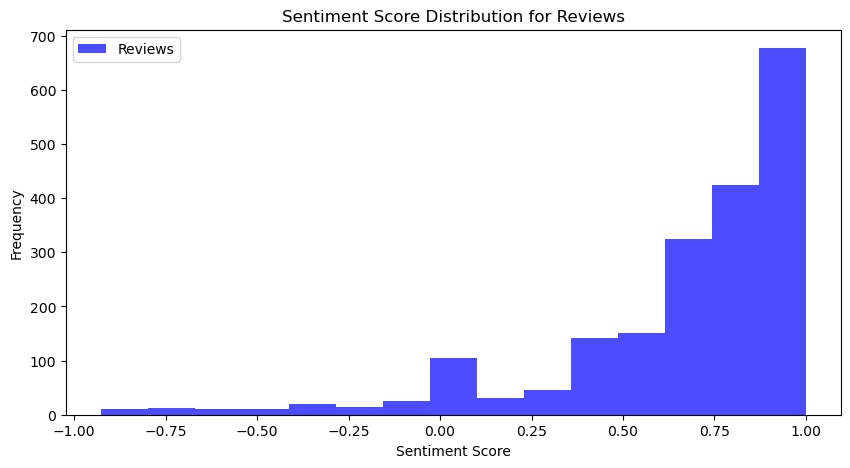

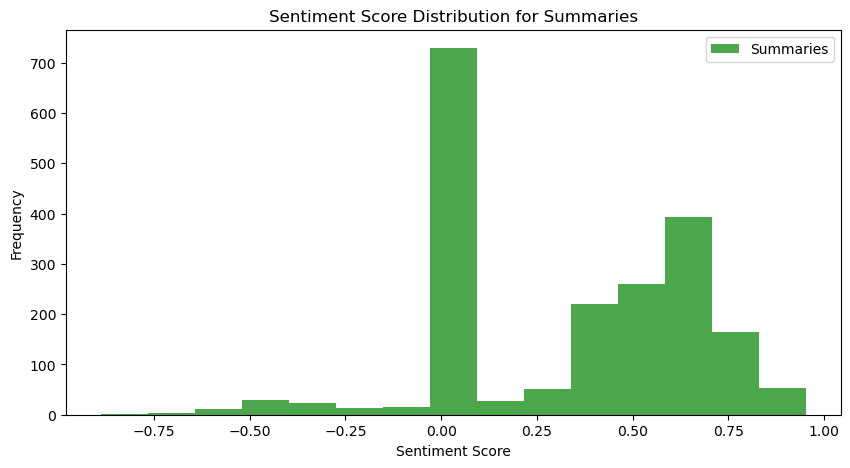

In [44]:
# Plot histogram for review sentiment scores

plt.figure(figsize=(10, 5))
plt.hist(data['sentiment_score'], bins=15, color='blue', alpha=0.7, label='Reviews')
plt.title('Sentiment Score Distribution for Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for summary sentiment scores

plt.figure(figsize=(10, 5))
plt.hist(data['sentiment_score_summary'], bins=15, color='green', alpha=0.7, label='Summaries')
plt.title('Sentiment Score Distribution for Summaries')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Discuss: Insights and observations

The most frequent words in reviews and summaries are words like 'great','fun' and, 'game'. This shows that Turtle Games' products are well-recieved 

In reviews the sentiment overall is positive with a significant portion of the customer base expressing satisfaction (many reviews clustered with a sentiment score close to 1.0). 
    The positive reviews focus on joy, engagement and product recommendations.
    The negative reviews focus on product quality issues, user experience, or value for money.

In summaries the sentiment is still on average positive but there is a large sum of neutral sentiment. This may reflect their concise nature compared to the more detailed reviews.

## Cons, biases and assumptions

A negative aspect of this work includes the fact that sentiment analysis does not consider nuances such as sarcasm and context. As a result of this it may misinterpret the sentiments.

Another con to the sentiment analysis is that it does not consider for multilingual customers.

An assumption of this work is that removal of punctuation and lowercasing improves the data quality. While usually true, it could definitely oversimplify text, causing context to be missed.

The analysis is skewed towards review/summary length, as the longer the review/summary the more frequent words will be used.

One algorithmic bias in this work is with the use of sentiment analysis tools, like VADER. As VADER is not based on pre-trained lexicon it may not accurately reflect gaming related terms. Not accounting for slang and technical jargon may cause misinterpreted sentiment.

## Summary

In both the reviews and summaries columns words like 'great', 'fun', and 'love' are extremely prevelant, showing that the products are well recieved overall. 'Game', 'expansion' and 'book' also being prevelant shows the products which are most reviewed, and thus most well recieved due to the largely positive nature of the customers reviews which I know from many of the afformentioned reviews being clustered with a sentiment score of 1.0. Previously mentioned engagement and retainment strategies will be acutely affective due to the positive nature of the customer base.

The negative reviews are focused on issues like product quality, user experience and value for money. These specific complaints are very usual in gaming and retail but that doesn't mean there isnt room for improvement. Introducing metalic items in games boxes has shown to improve customer viewing of the quality of a product, so introducing cheap but metalic, small pins or similar items to certain products with medium to high price tags could improve sentiment on quality and value for money. 

To conclude, Turtle Games needs to; focus on the highly positive reviews for marketing and promotion, leveraging the fact that a majority of the users are very satisfied; improve certain products in house or by contacting manufacturers and; try to improve the neutral sentiment in the majority of summaries in order to garner even more feedback.

# 